# Why is there a Bias-Variance trade-off?

a) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

The first term $E[g(x_0)]$ is the expected value of an estimator at that point, and $f(x_0)$ is the true value at the same point. It calculates the expected difference between its estimates and the true values in the data, hence this is the bias of the estimator $g(X)$ at test point $x_0$. 

b) Why is there a tradeoff between bias and variance. 

If our model is too simple and has very few parameters then it may **have high bias and low variance**. On the other hand if our model has large number of parameters then it’s going to **have high variance and low bias**. So we need to find the **right/good balance without overfitting and underfitting the data**. This **tradeoff in complexity** is why there is a tradeoff between bias and variance. 

# Bias/Variance experimental exploration comparing models with different complexity.

Steps to effectively build a model that can predict y for unknown inputs x:

(a) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test).

(b) Which model gives the best performance? It is important to explain in terms of the bias-variance tradeoff.

(c) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.

In [2]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

In [ ]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Define plot styles and colors for each model 
  degs = [2, 4, 7]
  plot_styles = ['-', '-.', 'o', '*']
  point_colors = ['blue', 'red', 'green', 'cyan']
  fig, ax = plt.subplots(1, 1, figsize=(8,8))

  # Plot the train and test data 
  ax.plot(x_train, y_train,'ok', label='Train data')
  ax.plot(x_test.reshape(-1,1), y_test.reshape(-1,1), 'or', label='Test data')

  train_rmses, test_rmses = [], []
  # For each degree plot, zip packages the values into a tuple to iterate 
  for deg, plot_style, point_color in zip(degs, plot_styles, point_colors):
      lrp = LinearRegression()
      # np.vander - generate the power of the input vector i.e, the columns of the output matrix are powers of the input vector
      lrp.fit(np.vander(np.squeeze(x_train), deg+1), y_train)
      # Generate the predictions for test set and x_all 
      y_pred = lrp.predict(np.vander(np.squeeze(x_test), deg+1))
      y_all = lrp.predict(np.vander(np.squeeze(x_all), deg+1))
      
      # compute mean squared error
      mse = mean_squared_error(y_test, y_pred)
      y_pred_train = lrp.predict(np.vander(np.squeeze(x_train), deg+1))
      mse_train = mean_squared_error(y_train, y_pred_train)
      
      train_rmses.append(mse_train)
      test_rmses.append(mse)
      
      ax.plot(x_all, y_all ,label='degree %d' % deg)
      # ax.plot(x_test, y_pred, 'o')
      ax.legend(loc=2)
      
      # Limit the graph to visualize the plot better
      ax.set_ylim([-35,35])
      ax.set_xlim([-5,5])
      print('Degree %d train mse = %.3f' % (deg, mse_train))
      print('Degree %d test mse = %.3f' % (deg, mse))
  plt.show()
  return train_rmses, test_rmses

Degree 2 train mse = 247.297
Degree 2 test mse = 320.064
Degree 4 train mse = 31.720
Degree 4 test mse = 31.292
Degree 7 train mse = 30.677
Degree 7 test mse = 33.411


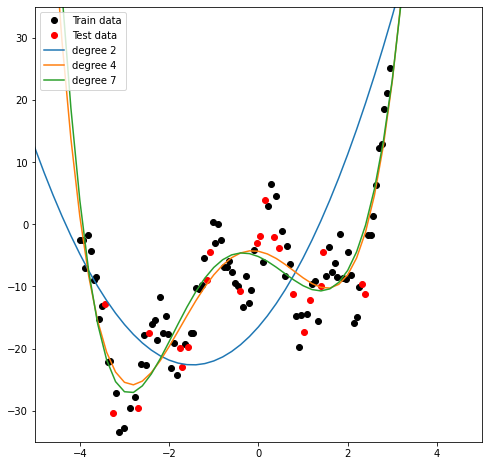

([247.2967979737153, 31.72001805729006, 30.677193592109738],
 [320.06408346977855, 31.29208288660671, 33.410694077690124])

In [ ]:
plot_curves(x_train, y_train, x_test, y_test)

b) Polynomial model of degree 4 is the best because the test error is the lowest. From the plot, it is clear that the as the model complexity increases (higher degree polynomial), the performance decreases - test error increases, which shows the low bias but high variance. When the model complexity decreases (lower degree polynomials), we find the model is underfitting, giving high bias.

20% data
Degree 2 train mse = 161.171
Degree 2 test mse = 402.323
Degree 4 train mse = 35.115
Degree 4 test mse = 38.341
Degree 7 train mse = 22.544
Degree 7 test mse = 135.208


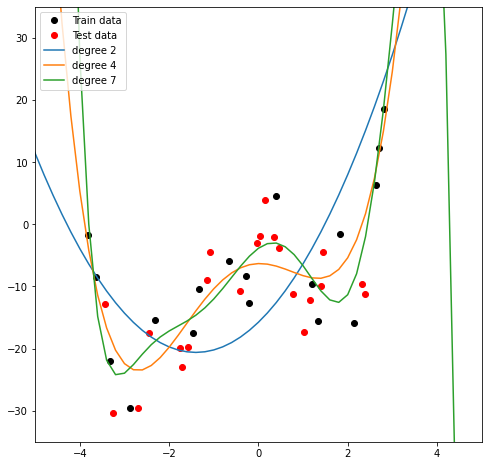

40% data
Degree 2 train mse = 150.333
Degree 2 test mse = 405.805
Degree 4 train mse = 31.625
Degree 4 test mse = 33.164
Degree 7 train mse = 25.493
Degree 7 test mse = 61.237


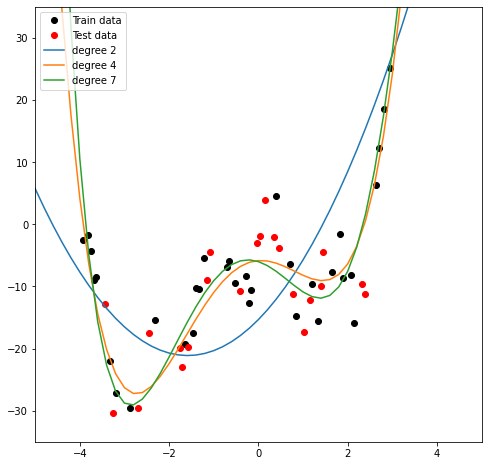

60% data
Degree 2 train mse = 150.084
Degree 2 test mse = 403.251
Degree 4 train mse = 29.193
Degree 4 test mse = 31.781
Degree 7 train mse = 26.099
Degree 7 test mse = 60.167


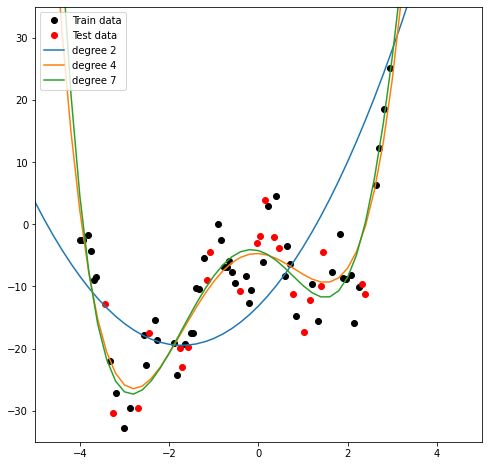

80% data
Degree 2 train mse = 168.119
Degree 2 test mse = 407.594
Degree 4 train mse = 29.305
Degree 4 test mse = 32.518
Degree 7 train mse = 26.549
Degree 7 test mse = 48.077


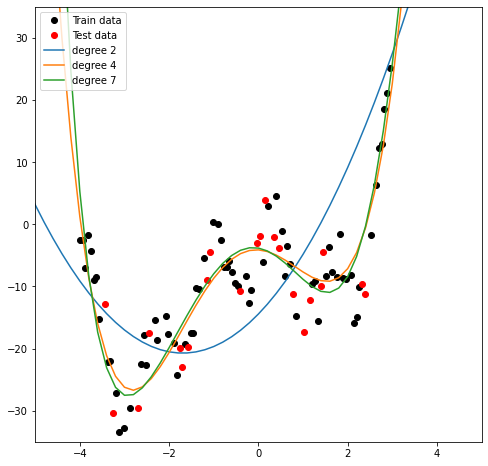

100% data
Degree 2 train mse = 247.297
Degree 2 test mse = 320.064
Degree 4 train mse = 31.720
Degree 4 test mse = 31.292
Degree 7 train mse = 30.677
Degree 7 test mse = 33.411


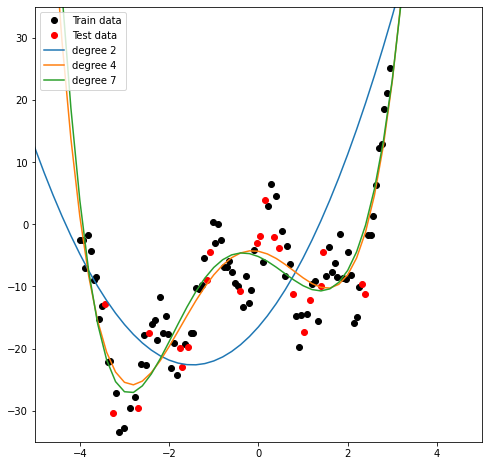

In [ ]:
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

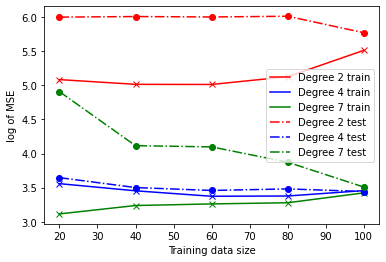

In [ ]:
train_rmses = [train_rmses_20, train_rmses_40, train_rmses_60, train_rmses_80, train_rmses_100]
test_rmses = [test_rmses_20, test_rmses_40, test_rmses_60, test_rmses_80, test_rmses_100]

degrees = [2,4,7]

color = ['r', 'b', 'g']
dataset_size = [20, 40, 60, 80, 100]
for deg in range(3):
    plt.plot(dataset_size, np.log(np.asarray(train_rmses)[:, deg]), '-'+color[deg], label='Degree ' + str(degrees[deg])+' train')
    plt.plot(dataset_size, np.log(np.asarray(train_rmses)[:, deg]), 'x'+color[deg])

for deg in range(3):
    plt.plot(dataset_size, np.log(np.asarray(test_rmses)[:, deg]), '-.'+color[deg], label='Degree ' + str(degrees[deg])+' test')
    plt.plot(dataset_size, np.log(np.asarray(test_rmses)[:, deg]), 'o'+color[deg])
plt.legend(loc=0)
plt.ylabel('log of MSE')
plt.xlabel('Training data size')
plt.show()


The degree 2 polynomial has a high bias as it majorly underfits the data, while the one with degree 8 has a high variance since it overfits the data. Thus, as you increase the training size, the performance on the test data does not change much on the degree 2 polynomial. However, increasing the training size improves the performance of the degree 7 polynomial.

# Gradient Descent vs. Stochastic Gradient Descent

1. Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages.

We calculate derivatives of loss functions with respect to each model parameter and then iteratively update them using the gradients.In Gradient descent, you have to run through **ALL** the samples in your training set to do a single update for a parameter in a particular iteration, in Stochastic Gradient descent, you use **ONLY ONE** training sample from your training set to do the update for a parameter in a particular iteration. In Gradient descent, loss function usually **decreases** at each iteration but in Stochastic gradient descent loss function **might go up in some or come down**.In comparison to Gradient descent, Stochastic gradient descent is noisy due to the addition of unwanted gradients in the data of original gradients
 
2. How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?

Nelder-Mead method dynamically adjusts the step size based off the loss of the new point. If the new point is better than any previously seen value, it expands the step size to accelerate towards the bottom. Likewise if the new point is worse it contracts the step size to converge around the minima. The biggest downside to any direct search method like this is that they all start to perform terribly with higher dimensional functions. For 1 and 2 dimensional examples like above, Nelder-Mead performs well - but machine learning models can grow to millions if not billions of parameters, and this method won’t work on even simple problems with more than a dozen or so parameters.





# Stochastic gradient descent

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 


The loss function for a single point $x_i, y_i$ is:
\begin{equation}
E_i(w) = \left( w_0 + w_1x_1 + w_2x_1x_2  + w_3e^{-x_1} - y \right)^2
\end{equation}

Let:
\begin{equation}
e_i(w) = w_0 + w_1x_1 + w_2x_1x_2  + w_3e^{-x_1} - y
\end{equation}

Then:
\begin{align}
E_i(w) = e_i(w)^2 \\
\frac{\partial E_i}{\partial w_0} = 2 e_i(w) \\
\frac{\partial E_i}{\partial w_1} = 2 e_i(w) x_{i1} \\
\frac{\partial E_i}{\partial w_2} = 2 e_i(w) x_{i1}x_{i2} \\
\frac{\partial E_i}{\partial w_3} = 2 e_i(w) e^{-x_1}\\
\end{align}

The update for each element of $w$ is:
\begin{equation}
w_j^{\tau+1} = w_j^{\tau} - \eta \frac{\partial E_i}{\partial w_j}
\end{equation}

\begin{equation}
w_0^{\tau+1} = w_0^{\tau} - \eta {2 e_i(w)}
\end{equation}

\begin{equation}
w_1^{\tau+1} = w_1^{\tau} - \eta {2 e_i(w) x_{i1}}
\end{equation}

\begin{equation}
w_2^{\tau+1} = w_2^{\tau} - \eta {2 e_i(w) x_{i1}x_{i2}}
\end{equation}

\begin{equation}
w_3^{\tau+1} = w_3^{\tau} - \eta {2 e_i(w) e^{-x_1}}
\end{equation}


# Stochastic Gradient Descent coding

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

Use the new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

Report the MSE of the two best combinations of learning rate and regularization constant.

In [6]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [5]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-6
        self.coef = np.zeros(4) #one coef for each of the terms
        
    def sgd(self, gradient):
        self.coef = self.coef - (self.learning_rate * gradient)
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        
        
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                X_i = X[i,:]
                e_i = self.linearPredict(X_i) - y[i]
                # Compute gradients
                gradient = (e_i * X_i) + (self.regularization * self.coef)
                
                # Update weights
                if update_rule == 'sgd':
                    self.sgd(gradient)
   
            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):
        return X.dot(self.coef)

Best Hyper parameter 1: (0.01, 0)
Best Hyper parameter 2: (0.001, 0)
[0.027391087575201013, 0.030495991520073516]


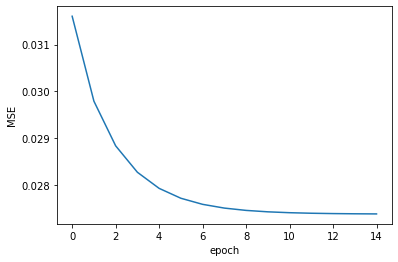

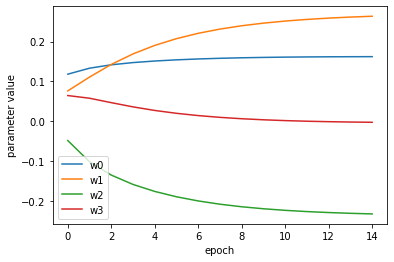

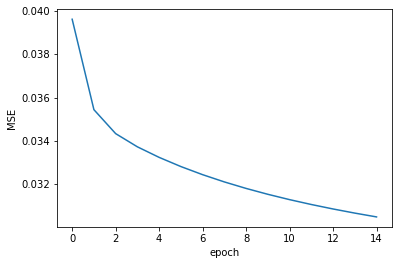

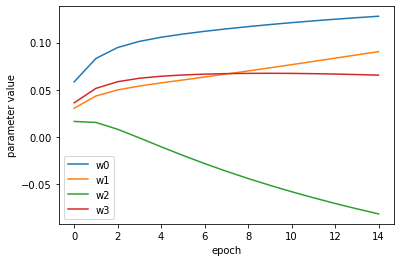

In [7]:
hyper = []
for lr in range(0, len(learning_rate)):
    for reg in range(0, len(regularization)):
        hyper.append((learning_rate[lr], regularization[reg]))
lowest_scores = []
for hyper_iter in range(0, len(hyper)):
    sgd = Regression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    sgd.fit(X,y,plot=False)
    lowest_scores.append(sgd.lowest_mse)
    
chosen_hyper = np.argsort(np.array(lowest_scores))[:2]
print("Best Hyper parameter 1:",hyper[chosen_hyper[0]])
print("Best Hyper parameter 2:",hyper[chosen_hyper[1]])
lowest_scores = []
for hyper_iter in chosen_hyper:
    sgd = Regression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    sgd.fit(X,y,plot=True)
    lowest_scores.append(sgd.lowest_mse)
print(lowest_scores)

sgd = Regression(.01,0,n_epochs)

In [8]:
#best parameters for sgd
print(chosen_hyper)
print("Best hyperparameters for SGD")
print(hyper[6])  #lr
print(hyper[3])  #regularization

[6 3]
Best hyperparameters for SGD
(0.01, 0)
(0.001, 0)
